In [357]:
!pip install matplotlib
!pip install sklearn

In [358]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import datetime
# Ignore warning messages
warnings.filterwarnings('ignore')

In [359]:
car_details = pd.read_csv("CAR DETAILS.csv")
print(type(car_details))
car_details.head(10)

<class 'pandas.core.frame.DataFrame'>


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
5,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,First Owner
7,Tata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Manual,Second Owner
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,Petrol,Individual,Manual,First Owner
9,Maruti Celerio Green VXI,2017,365000,78000,CNG,Individual,Manual,First Owner


In [360]:
car_details.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

In [361]:
car_details.shape

(4340, 8)

In [362]:
duplicate = car_details.duplicated()
duplicate.sum()

763

In [363]:
car_details.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [364]:
df=car_details.copy()

In [365]:
car_details.drop_duplicates(inplace=True)

In [366]:
car_details.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [367]:
car_details.shape

(3577, 8)

### Feature engineering

In [368]:
#Convert 'year' to number of years car used till today
#current_year = pd.to_datetime('today').year
#car_details['year'] = current_year - car_details['year']

In [369]:
#car_details[['manufacturer', 'model']] = car_details['name'].str.split(' ', 1, expand=True)

In [370]:
#Split the name column into manufacturer and model
#car_details['manufacturer'] = car_details['name'].apply(lambda x: x.split(' ', 1)[0])
#car_details['model'] = car_details['model'].apply(lambda x: x.split(' ', 1)[0] if len(x.split(' ')) > 0 else '')

In [371]:
car_details.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [372]:
car_details.drop(['name'],axis=1,inplace=True)

In [373]:
null_values = car_details.isnull().sum()
null_values

year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [374]:
car_details.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [375]:
car_details['transmission']

0       Manual
1       Manual
2       Manual
3       Manual
4       Manual
         ...  
4335    Manual
4336    Manual
4337    Manual
4338    Manual
4339    Manual
Name: transmission, Length: 3577, dtype: object

### Data Preprocessing

In [376]:
from sklearn.impute import SimpleImputer

In [377]:
# Perform imputation for numerical features
imputer = SimpleImputer(strategy='median')
car_details['km_driven'] = imputer.fit_transform(car_details[['km_driven']])

In [378]:
# Perform imputation for categorical features
imputer = SimpleImputer(strategy='most_frequent')
car_details[['fuel', 'seller_type', 'transmission', 'owner']] = imputer.fit_transform(car_details[['fuel', 'seller_type', 'transmission', 'owner']])

In [379]:
car_details.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000.0,Petrol,Individual,Manual,First Owner
1,2007,135000,50000.0,Petrol,Individual,Manual,First Owner
2,2012,600000,100000.0,Diesel,Individual,Manual,First Owner
3,2017,250000,46000.0,Petrol,Individual,Manual,First Owner
4,2014,450000,141000.0,Diesel,Individual,Manual,Second Owner


In [380]:
#car_details['fuel'].replace(['Petrol','Diesel','LPG','CNG','Electric'],[1,2,3,4,5], inplace=True)
#car_details['seller_type'].replace(['Individual','Dealer','Trustmark Dealer'],[1,2,3], inplace=True)
#car_details['transmission'].replace(['Manual','Automatic'],[0,1], inplace=True)
#car_details['owner'].replace(['First Owner','Second Owner','Third Owner','Fourth & Above Owner','Test Drive Car'],[1,2,3,4,0], inplace=True)


In [381]:
car_details.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000.0,Petrol,Individual,Manual,First Owner
1,2007,135000,50000.0,Petrol,Individual,Manual,First Owner
2,2012,600000,100000.0,Diesel,Individual,Manual,First Owner
3,2017,250000,46000.0,Petrol,Individual,Manual,First Owner
4,2014,450000,141000.0,Diesel,Individual,Manual,Second Owner


In [382]:
#car_encoded = car_details.copy()

In [383]:
# One-hot encoding for categorical features
car_encoded = pd.get_dummies(car_details, drop_first=True)

In [384]:
car_encoded

,year,selling_price,km_driven,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2007,60000,70000.0,0,0,0,1,1,0,1,0,0,0,0
1,2007,135000,50000.0,0,0,0,1,1,0,1,0,0,0,0
2,2012,600000,100000.0,1,0,0,0,1,0,1,0,0,0,0
3,2017,250000,46000.0,0,0,0,1,1,0,1,0,0,0,0
4,2014,450000,141000.0,1,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,2014,409999,80000.0,1,0,0,0,1,0,1,0,1,0,0
4336,2014,409999,80000.0,1,0,0,0,1,0,1,0,1,0,0
4337,2009,110000,83000.0,0,0,0,1,1,0,1,0,1,0,0
4338,2016,865000,90000.0,1,0,0,0,1,0,1,0,0,0,0


In [385]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [386]:
# Scaling the numerical features
scaler = StandardScaler()
car_encoded[['year', 'km_driven']] = scaler.fit_transform(car_encoded[['year', 'km_driven']])
car_encoded

,year,selling_price,km_driven,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,-1.402566,60000,0.015754,0,0,0,1,1,0,1,0,0,0,0
1,-1.402566,135000,-0.404650,0,0,0,1,1,0,1,0,0,0,0
2,-0.226418,600000,0.646360,1,0,0,0,1,0,1,0,0,0,0
3,0.949731,250000,-0.488731,0,0,0,1,1,0,1,0,0,0,0
4,0.244042,450000,1.508188,1,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,0.244042,409999,0.225956,1,0,0,0,1,0,1,0,1,0,0
4336,0.244042,409999,0.225956,1,0,0,0,1,0,1,0,1,0,0
4337,-0.932107,110000,0.289016,0,0,0,1,1,0,1,0,1,0,0
4338,0.714501,865000,0.436158,1,0,0,0,1,0,1,0,0,0,0


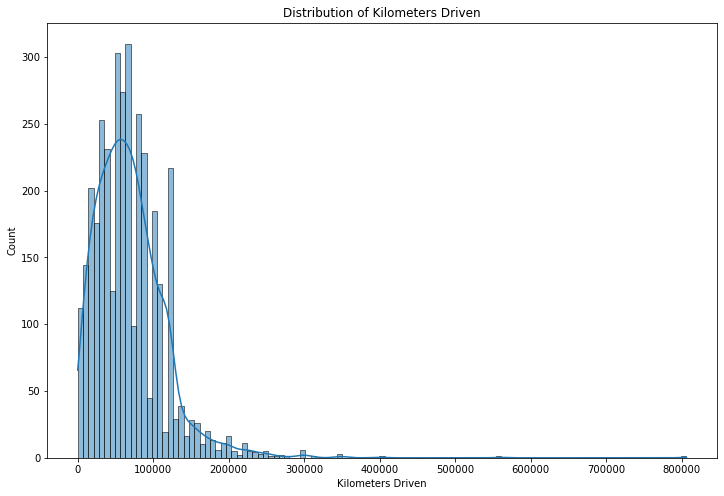

In [387]:
plt.figure(figsize=(12, 8))
sns.histplot(car_details['km_driven'], kde=True)
plt.title('Distribution of Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Count')
plt.show()

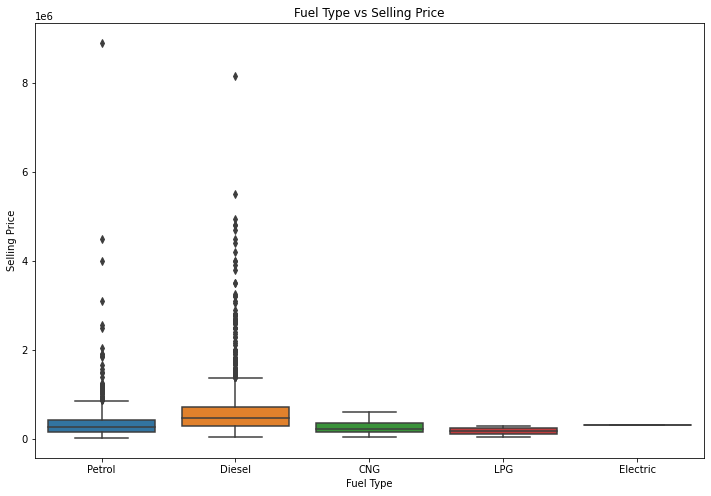

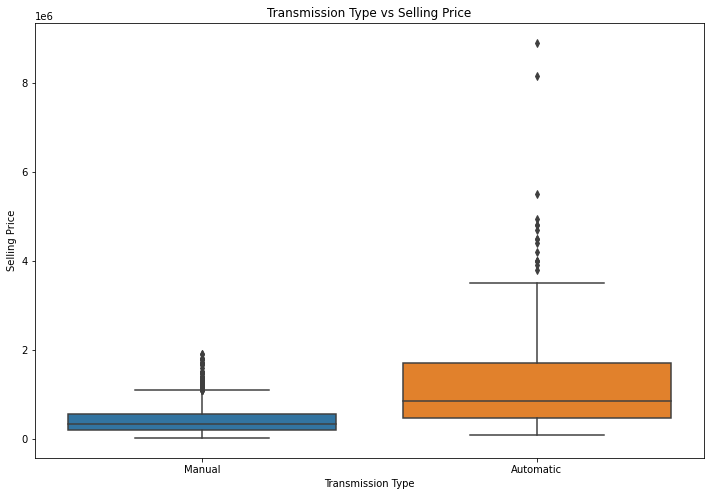

In [388]:
plt.figure(figsize=(12, 8))
sns.boxplot(x=df['fuel'], y=car_details['selling_price'])
plt.title('Fuel Type vs Selling Price')
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price')
plt.show()


plt.figure(figsize=(12, 8))
sns.boxplot(x=car_details['transmission'], y=car_details['selling_price'])
plt.title('Transmission Type vs Selling Price')
plt.xlabel('Transmission Type')
plt.ylabel('Selling Price')
plt.show()

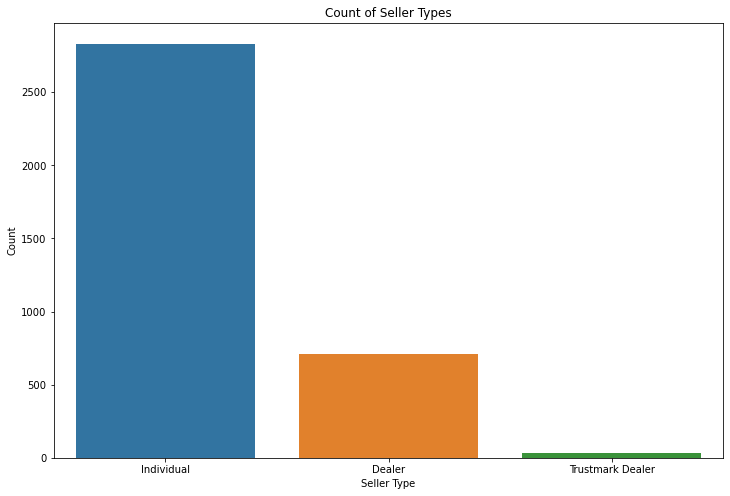

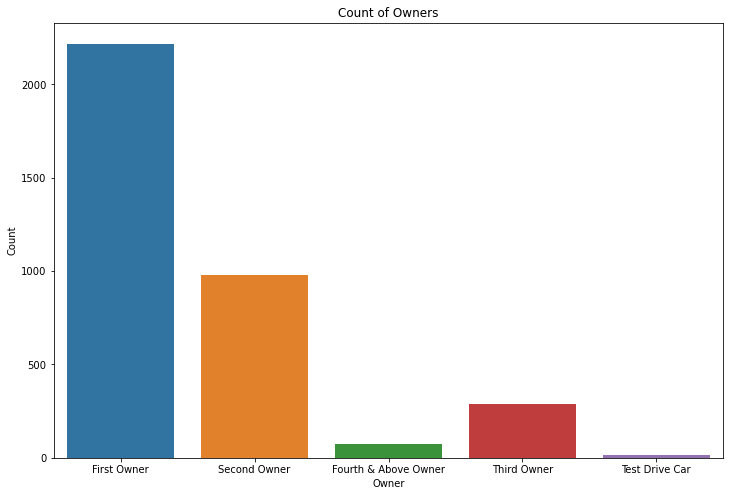

In [389]:
plt.figure(figsize=(12, 8))
sns.countplot(x=car_details['seller_type'])
plt.title('Count of Seller Types')
plt.xlabel('Seller Type')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 8))
sns.countplot(x=car_details['owner'])
plt.title('Count of Owners')
plt.xlabel('Owner')
plt.ylabel('Count')
plt.show()

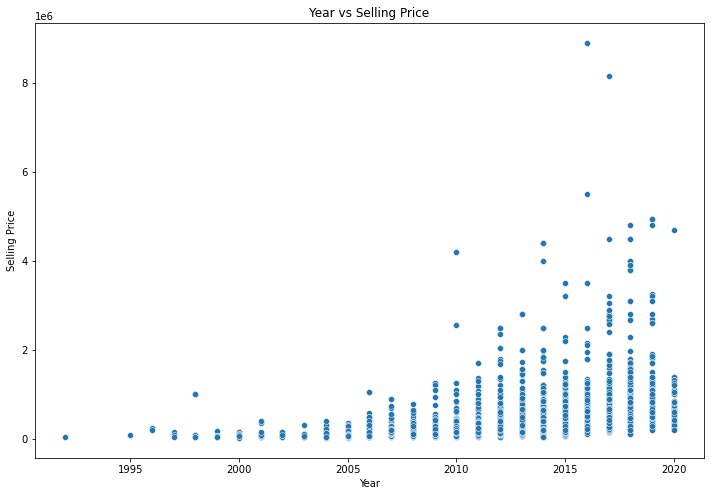

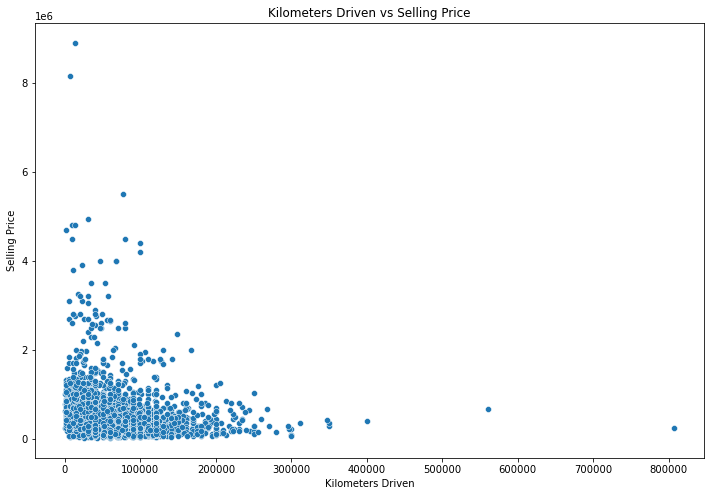

In [390]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df['year'], y=df['selling_price'])
plt.title('Year vs Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.show()

plt.figure(figsize=(12, 8))
sns.scatterplot(x=car_details['km_driven'], y=car_details['selling_price'])
plt.title('Kilometers Driven vs Selling Price')
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price')
plt.show()

In [391]:
# Correlation matrix
correlation_matrix = car_details.corr()
correlation_matrix

,year,selling_price,km_driven
year,1.00000,0.424260,-0.417490
selling_price,0.42426,1.000000,-0.187359
km_driven,-0.41749,-0.187359,1.000000


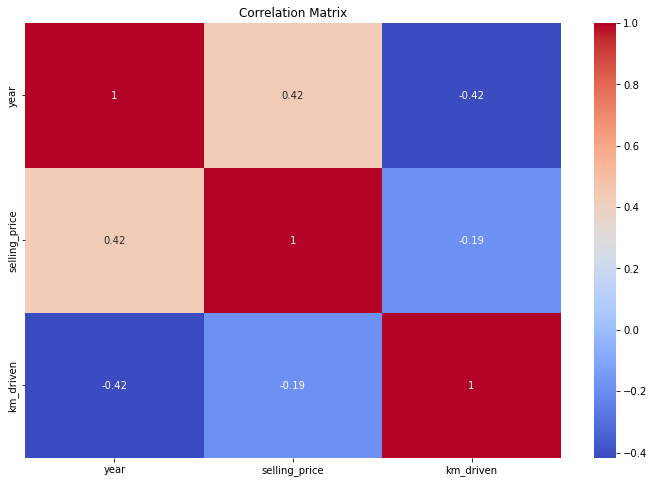

In [392]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [393]:
from sklearn.model_selection import train_test_split

In [394]:
# Split the data into features and target
x = car_encoded.drop('selling_price', axis=1)
y = car_encoded['selling_price']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2023)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2861, 13)
(716, 13)
(2861,)
(716,)


In [395]:
print(x.head())
print(y.head())

       year  km_driven  fuel_Diesel  fuel_Electric  fuel_LPG  fuel_Petrol  \
0 -1.402566   0.015754            0              0         0            1   
1 -1.402566  -0.404650            0              0         0            1   
2 -0.226418   0.646360            1              0         0            0   
3  0.949731  -0.488731            0              0         0            1   
4  0.244042   1.508188            1              0         0            0   

   seller_type_Individual  seller_type_Trustmark Dealer  transmission_Manual  \
0                       1                             0                    1   
1                       1                             0                    1   
2                       1                             0                    1   
3                       1                             0                    1   
4                       1                             0                    1   

   owner_Fourth & Above Owner  owner_Second Owner  owner

In [396]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import auc
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

In [397]:
a = {'Model':[],'r2 score':[],'MSE':[],'RMSE':[],'MAE':[]}

def evaluate(model,model_name,x_test,y_test,ypred):
    mse = mean_squared_error(y_test, ypred)
    r2 = r2_score(y_test, ypred)
    mae = mean_absolute_error(y_test, ypred)
    rmse = mean_squared_error(y_test, ypred,squared=False)
    print('mean squared error',mse)
    print('r2 score',r2)
    print('mean absolute error',mae)
    print('root mean squared error',rmse)
    a['Model'].append(model_name)
    a['r2 score'].append(r2)
    a['MSE'].append(mse)
    a['RMSE'].append(rmse)
    a['MAE'].append(mae)

def m_score(model):
    print('Training Score',model.score(x_train,y_train))   # Trainig Accuracy
    print('Testing Score',model.score(x_test,y_test))      # Testing Accuracy


### Applying Linear Regression

In [398]:
# Building the linreg model
linreg = LinearRegression()
# Fit the model on the training data
linreg.fit(x_train, y_train)

LinearRegression()

In [399]:
# Computing Training and testing score
m_score(linreg)

Training Score 0.44013027703629104
Testing Score 0.41487759825200665


In [400]:
# Make predictions on the test set
ypred_linreg = linreg.predict(x_test)
print(ypred_linreg)

[ 4.47957058e+05  6.35669407e+05  1.12972481e+06  7.34126480e+05
  4.94696154e+05  1.96177891e+05  4.98798785e+05  4.64596410e+05
  6.35589849e+05  4.43683129e+05  4.26845801e+05  3.09176508e+05
  8.76647717e+04  4.83254960e+05  4.09638403e+05  5.43346866e+05
  3.99228475e+05  1.32466865e+06  4.28358763e+05  5.23748570e+05
 -1.24857022e+05  4.65630090e+05 -2.46235956e+04  5.05028210e+05
  1.81211651e+05  4.13347826e+05  3.69284475e+05 -1.24737436e+05
  4.62483266e+05  1.46801409e+06  4.12060480e+05  1.45985580e+06
  3.32968955e+05  6.80300007e+05  4.61755927e+05  5.04680088e+05
  3.65652923e+05  2.83270915e+05  5.57873073e+05  5.19554418e+05
  4.07444319e+05  1.43807418e+06  4.87419401e+05  6.45999777e+05
  1.67785999e+05  4.82754170e+05  2.90101965e+05  4.17525117e+05
  1.24690540e+05  4.64596410e+05  7.30494928e+05  6.13602869e+05
  4.08622394e+05  7.81821384e+05  6.26323609e+05  4.25511719e+05
  1.15010944e+06  4.97765106e+05  5.58507869e+05  3.06578635e+05
  1.46863732e+06  3.41317

In [401]:
# Evaluate the model 
evaluate(linreg,'Lin_Reg',x_test,y_test,ypred_linreg)

mean squared error 148391300721.7298
r2 score 0.41487759825200665
mean absolute error 218054.82789710406
root mean squared error 385215.9144190824


### Lasso regression

In [402]:
!pip install Lasso

In [403]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [404]:
las = Lasso()
# Fit the model on the training data
las.fit(x_train,y_train)

Lasso()

In [405]:
# Make predictions on the test set
ypred_las = las.predict(x_test)

In [406]:
# Computing Training and testing score
m_score(las)

Training Score 0.4401302719538128
Testing Score 0.4148768375883155


In [407]:
# Evaluate the model 
evaluate(las,'Lasso_Reg',x_test,y_test,ypred_las)

mean squared error 148391493631.57944
r2 score 0.4148768375883155
mean absolute error 218054.88624060212
root mean squared error 385216.16481084935


### Ridge regression

In [408]:
rid = Ridge()
# Fit the model on the training data
rid.fit(x_train,y_train)

Ridge()

In [409]:
# Make predictions on the test set
ypred_rid = rid.predict(x_test)

In [410]:
# Computing Training and testing score
m_score(rid)

Training Score 0.44012072138629177
Testing Score 0.41483643135579773


In [411]:
evaluate(rid,'Ridge_Reg',x_test,y_test,ypred_rid)

mean squared error 148401740946.29968
r2 score 0.41483643135579773
mean absolute error 218025.2868734464
root mean squared error 385229.4653142458


#### Summary of regression models

In [412]:
sum = pd.DataFrame(a)
sum

,Model,r2 score,MSE,RMSE,MAE
0,Lin_Reg,0.414878,1.483913e+11,385215.914419,218054.827897
1,Lasso_Reg,0.414877,1.483915e+11,385216.164811,218054.886241
2,Ridge_Reg,0.414836,1.484017e+11,385229.465314,218025.286873


###  Applying Decision Tree Regressor

In [413]:
# Create and train a decision tree classifier
dt_Regressor = DecisionTreeRegressor()
# Fit the model on the training data
dt_Regressor.fit(x_train, y_train)

DecisionTreeRegressor()

In [414]:
# Make predictions on the test set
ypred_tree = dt_Regressor.predict(x_test)

In [415]:
evaluate(dt_Regressor,'Decision Tree',x_test,y_test,ypred_tree)

mean squared error 259943574610.29163
r2 score -0.02498467197989762
mean absolute error 240172.29467842836
root mean squared error 509846.61871026625


In [416]:
m_score(dt_Regressor)

Training Score 0.9487734265151704
Testing Score -0.02498467197989762


### KNN Regressor

In [417]:
knn_Regressor = KNeighborsRegressor()
# Fit the model on the training data
knn_Regressor.fit(x_train, y_train)

# Make predictions on the test set
knn_pred = knn_Regressor.predict(x_test)

In [418]:
evaluate(knn_Regressor,'KNN',x_test,y_test,knn_pred)

mean squared error 147977640996.7102
r2 score 0.41650870176435983
mean absolute error 195499.67513966482
root mean squared error 384678.62040502095


In [419]:
m_score(knn_Regressor)

Training Score 0.655220994522857
Testing Score 0.41650870176435983


### Support vector Machine

In [420]:
svm_Regressor = SVR()
# Fit the model on the training data
svm_Regressor.fit(x_train, y_train)

# Make predictions on the test set
svm_pred = svm_Regressor.predict(x_test)

In [421]:
evaluate(svm_Regressor,'SVM',x_test,y_test,svm_pred)

mean squared error 269765839745.97684
r2 score -0.06371488957921057
mean absolute error 277616.51356186287
root mean squared error 519389.87258703535


In [422]:
m_score(svm_Regressor)

Training Score -0.057739164952447686
Testing Score -0.06371488957921057


### Random forest

In [423]:
# Building the RF Model
rf = RandomForestRegressor(n_estimators=80,min_samples_split=50,max_depth=8)
# Fit the model on the training data
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=8, min_samples_split=50, n_estimators=80)

In [424]:
ypred_rf=rf.predict(x_test)

In [425]:
evaluate(rf,'Random Forest',x_test,y_test,ypred_rf)

mean squared error 120587535398.80774
r2 score 0.5245107496851447
mean absolute error 182663.31954497774
root mean squared error 347257.16032762773


In [426]:
m_score(rf)

Training Score 0.5787138283246465
Testing Score 0.5245107496851447


### Ensemble learning techniques

In [427]:
tree = DecisionTreeRegressor(random_state=2023,max_depth=3,min_samples_split=8)

In [428]:
ada_boost = AdaBoostRegressor(base_estimator=tree,n_estimators=80)
# Fit the model on the training data
ada_boost.fit(x_train,y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3,
                                                       min_samples_split=8,
                                                       random_state=2023),
                  n_estimators=80)

In [429]:
# Make predictions on the test set
ypred_adab = ada_boost.predict(x_test)

In [430]:
evaluate(ada_boost,'Ada boost',x_test,y_test,ypred_adab)

mean squared error 384121232171.6689
r2 score -0.5146301490554483
mean absolute error 477049.53661556233
root mean squared error 619775.146461738


In [431]:
m_score(ada_boost)

Training Score -0.16971399930973696
Testing Score -0.5146301490554483


### XG boost

In [432]:
!pip install xgboost

In [433]:
import xgboost as xgb

# Create an XGBoost Regressor
xgb_regressor = xgb.XGBRegressor(n_estimators=100)

# Fit the model on the training data
xgb_regressor.fit(x_train, y_train)

# Make predictions on the test data
xgb_pred = xgb_regressor.predict(x_test)
m_score(xgb_regressor)
evaluate(xgb_regressor,'XG boost',x_test,y_test,xgb_pred)

Training Score 0.9162962269076875
Testing Score 0.3789965032177939
mean squared error 157491007633.54962
r2 score 0.3789965032177939
mean absolute error 197639.63518571053
root mean squared error 396851.3671811521


## Comparing different Classification Models 

In [434]:
Model_performance = pd.DataFrame(a)
Model_performance

,Model,r2 score,MSE,RMSE,MAE
0,Lin_Reg,0.414878,1.483913e+11,385215.914419,218054.827897
1,Lasso_Reg,0.414877,1.483915e+11,385216.164811,218054.886241
2,Ridge_Reg,0.414836,1.484017e+11,385229.465314,218025.286873
3,Decision Tree,-0.024985,2.599436e+11,509846.618710,240172.294678
4,KNN,0.416509,1.479776e+11,384678.620405,195499.675140
5,SVM,-0.063715,2.697658e+11,519389.872587,277616.513562
6,Random Forest,0.524511,1.205875e+11,347257.160328,182663.319545
7,Ada boost,-0.514630,3.841212e+11,619775.146462,477049.536616
8,XG boost,0.378997,1.574910e+11,396851.367181,197639.635186


In [435]:
print(x_train.shape)
print(x_test.shape)
print(x.shape)
print(y.shape)

(2861, 13)
(716, 13)
(3577, 13)
(3577,)


In [436]:
# Building the RF Model
Bestmodel = RandomForestRegressor(n_estimators=80,min_samples_split=50,max_depth=8)
# Fit the model on the Actual data
Bestmodel.fit(x,y)

RandomForestRegressor(max_depth=8, min_samples_split=50, n_estimators=80)

In [437]:
car_encoded.head()

,year,selling_price,km_driven,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,-1.402566,60000,0.015754,0,0,0,1,1,0,1,0,0,0,0
1,-1.402566,135000,-0.404650,0,0,0,1,1,0,1,0,0,0,0
2,-0.226418,600000,0.646360,1,0,0,0,1,0,1,0,0,0,0
3,0.949731,250000,-0.488731,0,0,0,1,1,0,1,0,0,0,0
4,0.244042,450000,1.508188,1,0,0,0,1,0,1,0,1,0,0


In [438]:
#Predict on New Data
#Create a new dataset with 20 random data points from the car details dataset
new_data = car_encoded.sample(n=20, random_state=2023)
new_data.shape

(20, 14)

In [439]:
new_data['selling_price'].value_counts()

349000    1
325000    1
150000    1
725000    1
500000    1
520000    1
190000    1
170000    1
70000     1
300000    1
470000    1
250999    1
700000    1
430000    1
110000    1
200000    1
340000    1
950000    1
345000    1
480000    1
Name: selling_price, dtype: int64

In [440]:
new_data.to_csv('sample_major.csv')

In [441]:
# Assuming the saved model is loaded as 'model'
X_test = new_data.drop("selling_price", axis=1)  # Assuming "selling_price" is the target variable
Y_test = new_data["selling_price"]

# Saving and Loading the Best Model:

In [442]:
import joblib
# Save the best model
joblib.dump(Bestmodel, 'best_model.joblib')
# Load the model
loaded_model = joblib.load('best_model.joblib')

In [443]:
# Make predictions using the loaded model
predictions = loaded_model.predict(X_test)

In [444]:
print('Predictions:', predictions)

Predictions: [355453.5395015  520735.09664567 651560.56114446 890139.25552781
 427619.96166319 200504.71369146 370327.79548341 380353.78695686
 690186.41979967 373387.10007141 349921.41437594 326925.24532895
  99136.86114089 285015.43197857 351308.37381524 510275.16943267
 402794.11667592 789822.5019928  400273.72613086 552548.35429513]


In [445]:
results = pd.DataFrame({"Actual Selling Price": Y_test, "Predicted Selling Price": predictions})
print(results)

      Actual Selling Price  Predicted Selling Price
2003                349000            355453.539501
1395                325000            520735.096646
2085                345000            651560.561144
4139                950000            890139.255528
1063                340000            427619.961663
1918                200000            200504.713691
658                 110000            370327.795483
2164                430000            380353.786957
1817                700000            690186.419800
2027                250999            373387.100071
2631                470000            349921.414376
243                 300000            326925.245329
2287                 70000             99136.861141
1226                170000            285015.431979
1266                190000            351308.373815
1099                520000            510275.169433
1486                500000            402794.116676
1148                725000            789822.501993
812         